<a href="https://colab.research.google.com/github/kipdallaris/Python451Dallaris/blob/main/Dallarisefficientfrontier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Harry Markowitz founded the Modern Portfolio Theory (MPT), in which the most fundamental aspect is to **maximize** **returns** while **minimizing risks**.


### MPT means that investors can increase their returns, while minimizing or having no additional risk, by investing in different asset classes instead of just one.

### Having a combination of securities that lack correlation with each other, allows investors to increase or optimize their returns without increasing the risk of their portfolio.

### Encourages **diversification**.

### also known as **mean-variance analysis**.

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')
import datetime

## The goal is to plot the **Efficient Frontier**:

Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows the set of optimal portfolios that offer the **highest** **expected return **for a given risk level or the **lowest risk** for a given level of expected return.

### Let us start by getting tickers from Wikipedia:

In [2]:
stockInfo = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers_np = stockInfo['Symbol'].to_numpy()

In [3]:
tickers = ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN','LLY','SPY']
for ticker in tickers:
    globals()[ticker] = yf.Ticker(ticker)
    globals()[ticker] = globals()[ticker].history(start = "2020-01-01", end= "2024-12-31")

for ticker in tickers:
  globals()[ticker] = globals()[ticker].Close

df = pd.DataFrame()
for ticker in tickers:
    df[ticker] = globals()[ticker]

df

,MMM,AOS,ABT,ABBV,ACN,LLY,SPY
Date,,,,,,,
2020-01-02 00:00:00-05:00,122.357430,43.422451,79.273956,71.589775,195.263596,123.702293,300.291534
2020-01-03 00:00:00-05:00,121.303795,43.040657,78.307533,70.910255,194.938370,123.290634,298.017731
2020-01-06 00:00:00-05:00,121.419342,43.313366,78.717796,71.469872,193.665421,123.749062,299.154602
2020-01-07 00:00:00-05:00,120.929939,43.022499,78.280159,71.062149,189.484192,123.983002,298.313507
2020-01-08 00:00:00-05:00,122.785675,42.958851,78.599274,71.565796,189.855850,125.105759,299.903351
...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,128.346893,68.213684,113.713264,176.723465,358.769989,794.910034,592.906433
2024-12-24 00:00:00-05:00,129.720123,68.542015,114.160919,178.318420,361.630005,794.301025,599.496582
2024-12-26 00:00:00-05:00,130.536087,68.542015,114.668251,177.525894,360.429993,792.773682,599.536499


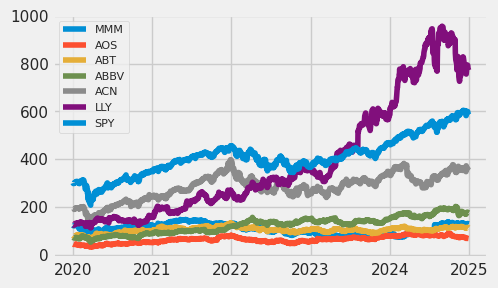

In [4]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 3))
plt.plot(df, label=df.columns)
plt.legend(loc='upper left',fontsize=8)
plt.show()

### Log returns of the 7 assets:

In [5]:
data = np.log(df/df.shift(1))
data.iloc[0] = 0
data.head(5)

,MMM,AOS,ABT,ABBV,ACN,LLY,SPY
Date,,,,,,,
2020-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03 00:00:00-05:00,-0.008648,-0.008831,-0.012266,-0.009537,-0.001667,-0.003333,-0.007601
2020-01-06 00:00:00-05:00,0.000952,0.006316,0.005225,0.007861,-0.006551,0.003711,0.003808
2020-01-07 00:00:00-05:00,-0.004039,-0.006738,-0.005575,-0.005721,-0.021826,0.001889,-0.002816
2020-01-08 00:00:00-05:00,0.015229,-0.001481,0.004068,0.007062,0.001960,0.009015,0.005315


## Now, create annualized covariance and correlation matrices.

### Covariance measures the **directional relationship** between the returns on two assets.

In [6]:
data.mean()*250
cov_matrix = data.cov() * 250
cov_matrix

,MMM,AOS,ABT,ABBV,ACN,LLY,SPY
MMM,0.084735,0.044532,0.029603,0.022298,0.039521,0.019445,0.034763
AOS,0.044532,0.090048,0.027495,0.019606,0.041046,0.020330,0.036544
ABT,0.029603,0.027495,0.067746,0.028886,0.039750,0.030728,0.033485
ABBV,0.022298,0.019606,0.028886,0.061874,0.026031,0.031754,0.024058
ACN,0.039521,0.041046,0.039750,0.026031,0.085552,0.029804,0.047499
LLY,0.019445,0.020330,0.030728,0.031754,0.029804,0.102445,0.028939
SPY,0.034763,0.036544,0.033485,0.024058,0.047499,0.028939,0.044097


### Correlation measures the **degree** to which two securities move in relation to each other.

In [7]:
corr_matrix =data.corr() * 250
corr_matrix

,MMM,AOS,ABT,ABBV,ACN,LLY,SPY
MMM,250.000000,127.451152,97.678333,76.986511,116.044920,52.176030,142.174905
AOS,127.451152,250.000000,88.007033,65.666512,116.912869,52.917310,144.982652
ABT,97.678333,88.007033,250.000000,111.538780,130.531544,92.210978,153.158672
ABBV,76.986511,65.666512,111.538780,250.000000,89.446053,99.711684,115.146207
ACN,116.044920,116.912869,130.531544,89.446053,250.000000,79.588176,193.334715
LLY,52.176030,52.917310,92.210978,99.711684,79.588176,250.000000,107.640077
SPY,142.174905,144.982652,153.158672,115.146207,193.334715,107.640077,250.000000


In [8]:
portfolio1 = data[['MMM','LLY']]
portfolio1.corr() * 250
portfolio1.cov() * 250
# portfolio1

,MMM,LLY
MMM,0.084735,0.019445
LLY,0.019445,0.102445


## Let us assign weights to each investment in the portfolio randomly, and find the variance of this portfolio.

In [9]:
w = {'MMM': 0.1, 'LLY': 0.2, 'AOS': 0.2, 'ABT': 0.1, 'ABBV': 0.2, 'ACN': 0.05, 'SPY': 0.15}
# sum of all elements in w
sum(w.values())

port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

np.float64(0.03703094319512287)

### To optimize the portfolio, we **cannot assign the weights**. We need exact weights that will maximize expected return for a given risk.

### So, let us get the yearly returns for each company using the package resample.

In [10]:
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

<ipython-input-10-fbdefa6d49e6>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = df.resample('Y').last().pct_change().mean()


,0
MMM,0.045164
AOS,0.144306
ABT,0.041581
ABBV,0.185137
ACN,0.153931
LLY,0.487153
SPY,0.155179


### Now, the portfolio returns: individual returns multiplied by weights in the portfolio.

In [11]:
weights = list(w.values())
port_er = (weights*ind_er).sum()
port_er

np.float64(0.13862811628062846)

## Calculate the volatility, or the annualized standard deviation.

In [12]:
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

,0
MMM,0.291209
AOS,0.300200
ABT,0.260385
ABBV,0.248844
ACN,0.292609
LLY,0.320197
SPY,0.210075


In [13]:
data.std()*np.sqrt(250)

,0
MMM,0.291093
AOS,0.300080
ABT,0.260281
ABBV,0.248745
ACN,0.292493
LLY,0.320070
SPY,0.209992


## Create a table for returns and volatility of assets.

In [14]:
assets = pd.concat([ind_er, ann_sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
MMM,0.045164,0.291209
AOS,0.144306,0.300200
ABT,0.041581,0.260385
ABBV,0.185137,0.248844
ACN,0.153931,0.292609
LLY,0.487153,0.320197
SPY,0.155179,0.210075


In [15]:
p_ret = []
p_vol = []
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [16]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its
                                      # weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [17]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [18]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,MMM weight,AOS weight,ABT weight,ABBV weight,ACN weight,LLY weight,SPY weight
0,0.152248,3.116219,0.085820,0.116030,0.231239,0.265559,0.218653,0.079398,0.003301
1,0.170146,3.161978,0.189054,0.195062,0.160749,0.015267,0.078002,0.168047,0.193818
2,0.126416,3.427833,0.358387,0.013329,0.092255,0.009191,0.278787,0.064349,0.183701
3,0.211017,3.084432,0.106688,0.226433,0.011314,0.182022,0.072083,0.198690,0.202770
4,0.192185,3.190315,0.056195,0.241715,0.037656,0.064149,0.157677,0.145703,0.296906


<Axes: xlabel='Volatility', ylabel='Returns'>

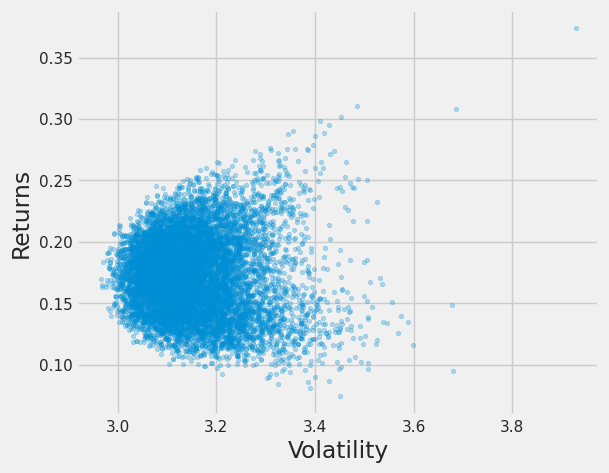

In [19]:

portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[6,5])

In [20]:
stockInfo = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers_np = stockInfo['Symbol'].to_numpy()

In [21]:
tickers = ['AMCR', 'ANSS', 'COO', 'CTVA', 'DPZ']
for ticker in tickers:
    globals()[ticker] = yf.Ticker(ticker)
    globals()[ticker] = globals()[ticker].history(start = "2010-01-01", end= "2024-12-31")

for ticker in tickers:
  globals()[ticker] = globals()[ticker].Close

df = pd.DataFrame()
for ticker in tickers:
    df[ticker] = globals()[ticker]

df

,AMCR,ANSS,COO,CTVA,DPZ
Date,,,,,
2012-05-15 00:00:00-04:00,4.707316,61.680000,21.648199,NaN,28.235466
2012-05-16 00:00:00-04:00,4.707316,62.360001,21.585924,NaN,27.703218
2012-05-17 00:00:00-04:00,4.707316,61.110001,21.361717,NaN,26.446756
2012-05-18 00:00:00-04:00,4.707316,59.799999,21.167406,NaN,26.141359
2012-05-21 00:00:00-04:00,4.707316,61.000000,21.503714,NaN,27.118612
...,...,...,...,...,...
2024-12-23 00:00:00-05:00,9.313039,339.500000,92.519997,56.766357,424.808655
2024-12-24 00:00:00-05:00,9.372294,342.839996,92.809998,57.324848,429.250549
2024-12-26 00:00:00-05:00,9.342667,340.160004,92.610001,57.274982,430.863953


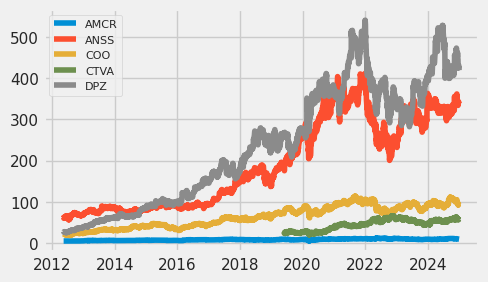

In [22]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 3))
plt.plot(df, label=df.columns)
plt.legend(loc='upper left',fontsize=8)
plt.show()

In [23]:
data = np.log(df/df.shift(1))
data.iloc[0] = 0
data.head(5)

,AMCR,ANSS,COO,CTVA,DPZ
Date,,,,,
2012-05-15 00:00:00-04:00,0.0,0.000000,0.000000,0.0,0.000000
2012-05-16 00:00:00-04:00,0.0,0.010964,-0.002881,NaN,-0.019030
2012-05-17 00:00:00-04:00,0.0,-0.020249,-0.010441,NaN,-0.046415
2012-05-18 00:00:00-04:00,0.0,-0.021670,-0.009138,NaN,-0.011615
2012-05-21 00:00:00-04:00,0.0,0.019868,0.015763,NaN,0.036702


In [24]:
data.mean()*250
cov_matrix = data.cov() * 250
cov_matrix

,AMCR,ANSS,COO,CTVA,DPZ
AMCR,0.060187,0.016668,0.017556,0.045499,0.009351
ANSS,0.016668,0.080326,0.032450,0.040018,0.025201
COO,0.017556,0.032450,0.064500,0.037834,0.020195
CTVA,0.045499,0.040018,0.037834,0.116820,0.018530
DPZ,0.009351,0.025201,0.020195,0.018530,0.079019


In [25]:
corr_matrix =data.corr() * 250
corr_matrix

,AMCR,ANSS,COO,CTVA,DPZ
AMCR,250.000000,59.930333,70.441332,114.478891,33.897660
ANSS,59.930333,250.000000,112.707579,84.660017,79.079771
COO,70.441332,112.707579,250.000000,96.726412,70.718906
CTVA,114.478891,84.660017,96.726412,250.000000,42.694779
DPZ,33.897660,79.079771,70.718906,42.694779,250.000000


In [26]:
portfolio1 = data[['COO','DPZ']]
portfolio1.corr() * 250
portfolio1.cov() * 250
# portfolio1

,COO,DPZ
COO,0.064500,0.020195
DPZ,0.020195,0.079019


In [27]:
w = {'AMCR': 0.1, 'ANSS': 0.2, 'COO': 0.2, 'CTVA': 0.1, 'DPZ': 0.2, }
# sum of all elements in w
sum(w.values())

port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

np.float64(0.023459820338422203)

In [28]:
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

<ipython-input-28-fbdefa6d49e6>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = df.resample('Y').last().pct_change().mean()


,0
AMCR,0.059912
ANSS,0.189978
COO,0.136936
CTVA,0.169014
DPZ,0.251056


In [29]:
weights = list(w.values())
port_er = (weights*ind_er).sum()
port_er

np.float64(0.13848660614629976)

In [30]:
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

,0
AMCR,0.245369
ANSS,0.283462
COO,0.254009
CTVA,0.341911
DPZ,0.281148


In [31]:
data.std()*np.sqrt(250)

,0
AMCR,0.245330
ANSS,0.283418
COO,0.253969
CTVA,0.341790
DPZ,0.281103


In [32]:
assets = pd.concat([ind_er, ann_sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
AMCR,0.059912,0.245369
ANSS,0.189978,0.283462
COO,0.136936,0.254009
CTVA,0.169014,0.341911
DPZ,0.251056,0.281148


In [33]:
p_ret = []
p_vol = []
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [34]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its
                                      # weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [35]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [36]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AMCR weight,ANSS weight,COO weight,CTVA weight,DPZ weight
0,0.155621,3.346830,0.155428,0.187468,0.241566,0.325543,0.089995
1,0.118508,3.507351,0.414050,0.016142,0.218992,0.334313,0.016502
2,0.153321,3.333585,0.277813,0.191337,0.048767,0.333742,0.148341
3,0.168642,3.019396,0.165929,0.117852,0.246886,0.186788,0.282545
4,0.151413,3.169272,0.234934,0.200080,0.189267,0.254953,0.120767


<Axes: xlabel='Volatility', ylabel='Returns'>

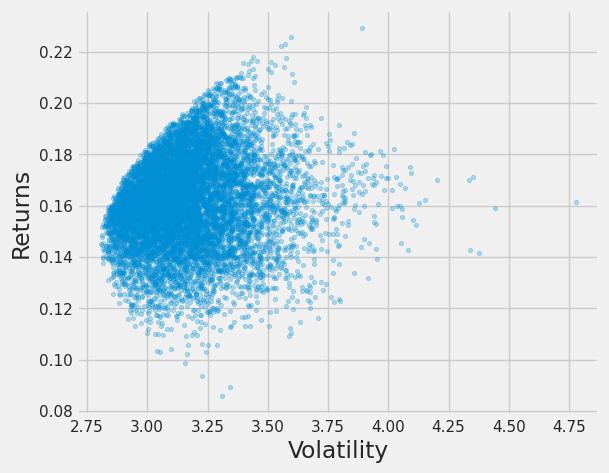

In [37]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[6,5])